# Recognizing my own handwritten digits through neural networks.


In this project we will train a Fully Connected and Convolutional Neural Network (FCNN and CNN) through the [MNIST]([http://yann.lecun.com/exdb/mnist/]) dataset, and analyse their accuracy in recognizing my own digits. The MNIST dataset consist of a training and test set of, respectively, 60,000 and 10,000 handwritten digits collected by the United States National Institute of Standards and Technology. Since all of these data are all size normalized, and centered in fixed size images, Will the neural networks be efficient to recognize digits that were not submited to the same procedures as the training dataset? 


In addition, other answer we aim to answer in this project is: "If we shift my digits up and down, does the prediction of both of the neural networks change? Why?". We could expect that for the CNN the predictions should not change, since this model is translational equivariant, while the FCNN would probably show a different behavior. So, let's check this empirically!       

### Importing modules

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D, BatchNormalization
import matplotlib.pyplot as plt 
from keras.utils import to_categorical
 

### Loading the MNIST and my digits data

Each of my own 10 handwritten digits of 28x28 pixels size images were previously converted to an greyscale array of size (28,28) and written in the file "mydigits.txt". So now we will read this data and also the MNIST digits array.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

mydata=open('mydigits.txt', 'r')
x_my=np.loadtxt(mydata).reshape(10,28,28)

# Normalize the train dataset
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_my = tf.keras.utils.normalize(x_my, axis=1)
y_my=np.array([0,1,2,3,4,5,6,7,8,9])

print("Shape of the training data: {}".format(np.shape(x_train)))
print("Shape of the test data: {}".format(np.shape(x_test)))
print('Shape of my own data: {}'.format(np.shape(x_my)))

Shape of the training data: (60000, 28, 28)
Shape of the test data: (10000, 28, 28)
Shape of my own data: (10, 28, 28)


### Loading the data for the CNN network

The CNN requires tensorflow model requires a different shape of input data. In addition, the y_train, y_test, and y_my need to pass through one-hot encoding process to convert the values to binary, so that is possible to the model to understand this data.

In [3]:
x_train2 = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test2 = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_my2=x_my.reshape(x_my.shape[0], 28, 28, 1)

y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)
y_my2=to_categorical(y_my)

### Building the FCNN Architecture

<img src="DNN-architecture-1.jpg" width="500" height="500" align="left"/>

Above it is possible to visualize the architecture chosen below for the Dense Network. First, a flatten layer was added to the model, so the 2-dimensional array of shape 28x28 could be converted to a 1-dimensional array of size 784, and used as an input layer that have one neuron for each pixel of the image arrays. After this, a dense layer was added, with hidden layer containing 128 neurones with relu activation function. Finally, the decision making proccess of the neural network was submited to an output layer with softmax activation function and 10 neurones, one for each of the possible outputs for the digits. Most of the parameters were arbitrarily chosen and experimentally verified in a way that the network could present at least 95% accuracy for the test data. More accurate models of DNN are possible to build, but that is outside the scope of this project. 

In [4]:
#Build the model object
model1 = Sequential()

# Add the Flatten Layer
model1.add(Flatten(input_shape=(28,28)))

# Build the hidden layer
model1.add(Dense(128, activation=tf.nn.relu))

# Build the output layer
model1.add(Dense(10, activation=tf.nn.softmax))

# Compile the model
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Building the CNN Architecture

<img src="CNN-architecture--.png" width="1200" height="370" align="left"/>

If you look to a basic CNN architecture represented in the image above, it is possible to notice that the model is basically the previous network with some different types of layers added before, that consist on the Convolutional and Maxpooling layers. These are responsible to teach the network to learn from local features of the image, in opposition to a FCNN that treats each pixel of the input separately. This is done first by a convolution operation between the input image array and a set of filters of weights that will be continuously updated through the learning proccess of the network. These calculations result in a number of feature maps that contains different local characteristics of the input image, such informations are subsequently downsampled in a maxpooling layer, in a way that the information from the convolutional layers can be simplified before it reachs the output.

For this project, the CNN model contains 3 Convolutional layers with, 24, 48 and 64 neurones, Relu activation function, and kernel size equal to 5. Each of these precede a Maxpooling layer. 

In [5]:
model2=Sequential()


model2.add(Conv2D(24,kernel_size=5,padding='same',activation='relu',input_shape=(28,28,1)))
model2.add(MaxPool2D())
    
model2.add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
model2.add(MaxPool2D())
    
model2.add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
model2.add(MaxPool2D(padding='same'))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Training the FCNN

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3174 - accuracy: 0.9124 - val_loss: 80.5864 - val_accuracy: 0.9251
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1459 - accuracy: 0.9567 - val_loss: 68.4240 - val_accuracy: 0.9423
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0986 - accuracy: 0.9703 - val_loss: 58.6060 - val_accuracy: 0.9506
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0736 - accuracy: 0.9785 - val_loss: 55.3556 - val_accuracy: 0.9537
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0568 - accuracy: 0.9831 - val_loss: 53.5379 - val_accuracy: 0.9581
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0452 - accuracy: 0.9863 - val_loss: 62.2421 - val_accuracy: 0.9586
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0358 - accuracy: 0.9896 - val_loss: 60.4439 - val_ac

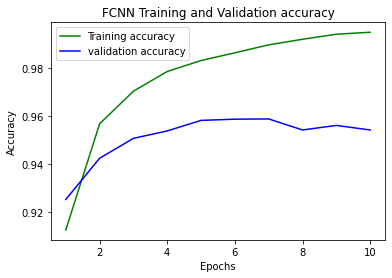

In [6]:
epochs=10
history1=model1.fit(x=x_train,y=y_train, epochs=epochs, validation_data=(x_test,y_test))

loss_train = history1.history['accuracy']
loss_val = history1.history['val_accuracy']
epochs = range(1,epochs+1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('FCNN Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Testing the FCNN with my digits

Accuracy with my digits
1/1 [==============================] - 0s 996us/step - loss: 2.3789 - accuracy: 0.6000


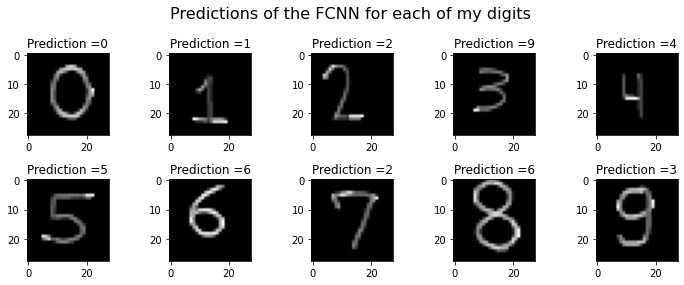

In [7]:

print('Accuracy with my digits')
model1.evaluate(x_my, y_my)

num_row=2
num_col=5
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
fig.suptitle('Predictions of the FCNN for each of my digits'
            , fontsize=16)
pred_model1=[]
for i in range(0,10):
    pred = model1.predict(x_my[i].reshape(1, 28, 28, 1))
    pred_model1.append(pred.argmax())
    ax = axes[i//num_col, i%num_col]
    ax.set_title( 'Prediction =' +str(pred_model1[i]))
    fig.tight_layout()
    ax.imshow(x_my[i], cmap='gray')

### Why the accuracy for this network is so different for my digits and the MNIST dataset?

As we saw above, the accuracy for the FCNN network with my own digits is of 50% in contrast to the MNIST dataset (95.2%). An possible explanation for that is the fact that the MNIST data were all size normalized and centered fixed sized images, in contrast to my own digits. To correct it, we could try to apply the same procedures to my digits, however, a good neural network should learn to deal with the real world. Thus, the best for us would be to try a better model that would be translational equivariant, such as a Convolutional Network.

### Training the CNN

Epoch 1/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1543 - accuracy: 0.9513 - val_loss: 19.4849 - val_accuracy: 0.9826
Epoch 2/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0441 - accuracy: 0.9862 - val_loss: 18.7336 - val_accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 15.6119 - val_accuracy: 0.9876
Epoch 4/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0240 - accuracy: 0.9923 - val_loss: 13.4951 - val_accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 16.1492 - val_accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0144 - accuracy: 0.9953 - val_loss: 15.3751 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 12

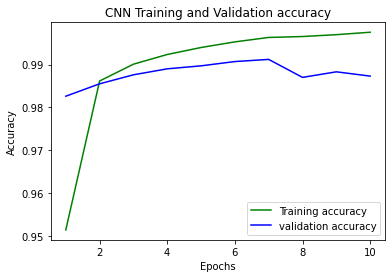

In [8]:
epochs=10
history2=model2.fit(x=x_train2, y=y_train2, epochs=epochs,validation_data=(x_test2, y_test2))

loss_train = history2.history['accuracy']
loss_val = history2.history['val_accuracy']
epochs = range(1,epochs+1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('CNN Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Testing the CNN with my digits

CNN accuracy with my digits: 
1/1 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
 


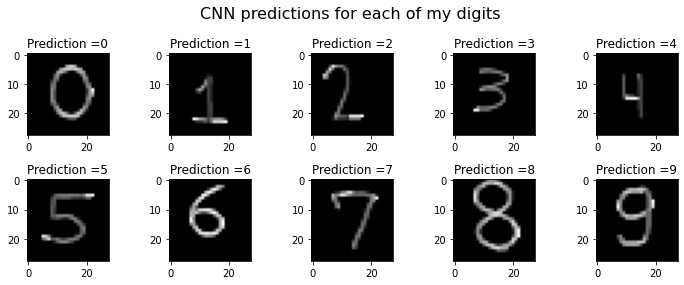

In [9]:
print('CNN accuracy with my digits: ')
model2.evaluate(x_my2, y_my2)
print(' ')

num_row=2
num_col=5
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
fig.suptitle('CNN predictions for each of my digits'
            , fontsize=16)
pred_model2=[]
for i in range(0,10):
    pred = model2.predict(x_my[i].reshape(1, 28, 28, 1))
    pred_model2.append(pred.argmax())
    ax = axes[i//num_col, i%num_col]
    ax.set_title( 'Prediction =' +str(pred_model2[i]))
    fig.tight_layout()
    ax.imshow(x_my[i], cmap='gray')

Now we can see, that the Convolutional Network predicted with 100% of accuracy all of my digits, what is really impressive, because the network trained with centralized data and even though could recognize digits that were not submitted to the same procedures as the training dataset. It looks like that the CNN really learned from the local features of the digits, no matter where they are. If this is true, we can expect that if we shift a certain digit up or down, the FCNN predictions would vary, while the CNN not. So let's check it below.

### How shifting a digit can affect the predictions of  the FCNN and the CNN?

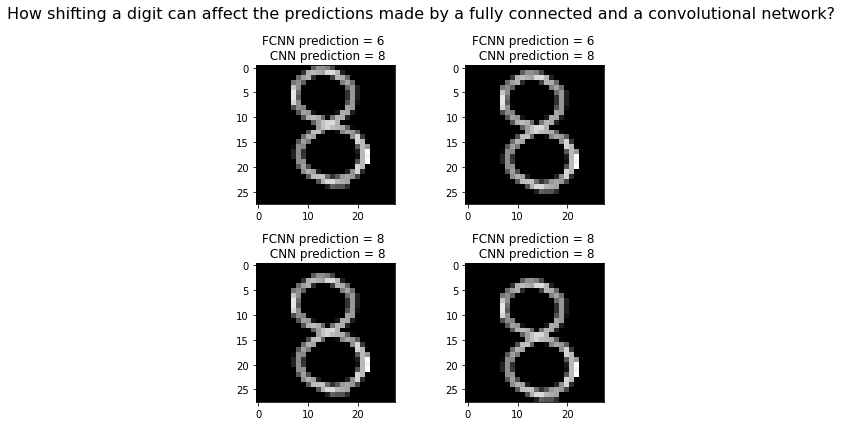

In [10]:
#Shifting the digit 8
number_8_shifted=np.zeros((4,28,28))
array=x_my[8]
i=0
while i < 4:
    number_8_shifted[i]=array
    row_to_move=array[27]
    array=np.delete(array,27,0)
    array=np.concatenate(([row_to_move],array),axis=0)
    i=i+1
    
#Plotting all the digits 8 shifted and observing the its predictions from model 1(fully connected network) 
#and model 2(convolutional network)   
num_row=2
num_col=2
pred_1=[]
pred_2=[]
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
fig.suptitle('How shifting a digit can affect the predictions made by a fully connected and a convolutional network?'
            , fontsize=16)
#fig.text('Ai AI AI')
for i in range(4):
    pred1 = model1.predict(number_8_shifted[i].reshape(1, 28, 28, 1))
    pred_1.append(pred1.argmax())
    pred2 = model2.predict(number_8_shifted[i].reshape(1, 28, 28, 1))
    pred_2.append(pred2.argmax())
    ax = axes[i//num_col, i%num_col]
    ax.imshow(number_8_shifted[i], cmap='gray')
    ax.set_title( 'FCNN prediction = '+str(pred_1[i]) + 
                 ' \n CNN prediction = '+str(pred_2[i]))
plt.tight_layout()
plt.show()

### Conclusion

After all the procedures applied in this project, it is evident that while the FCNN only learned to recognize centralized digits, the CNN were able to identify digits from different locations. The FCNN were efficient for the MNIST dataset, however it did not learn to understand digits from the real world, like the CNN. These results show how specific choices of neural networks architectures can affect its learning process.  